In [51]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

stops = set(stopwords.words("english"))

In [52]:
df=pd.read_excel("/kaggle/input/text-classification-ds/test.xlsx",sheet_name='Sheet1')
df.head(10)

,sentences
0,I love india
1,I love Hydera
2,I would like cricket
3,I will play badmidation
4,I love skoda rapid car
5,I lke skoda


Text data preprocessing steps

1- Data Cleaning : a) Removing punctuation. b) Lowercase letters 

2- Data Tokenization(using word_tokenize in nltk.tokenize) Segregation of text into individual words i.e tokens.

3- Stopword Removal(using stopwords in nltk.corpus) 

4- Stemming(using WordNetLemmatizer in nltk.stem) Combining different variants of words into a single parent word that conveys same meaning.

5-Vectorization (either using TfidVectorizer in sklearn.feature_extraction.text) Changing text data into vector format.

In [53]:
sentence=df['sentences']
#Converting text to lowercase characters
sentence = sentence.apply(lambda x: x.lower())
#Removing punctuation
sentence = sentence.apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
#Tokenizing data
sentence = sentence.apply(lambda x: word_tokenize(x))
#Removing stopwords
sentence = sentence.apply(lambda x: [i for i in x if i not in stops])
df['sentences']=sentence

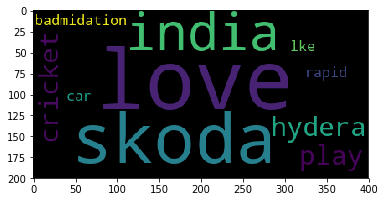

In [54]:
# Visualizing our cleaned data using WordCloud

text = ' '
for x in df['sentences']:
    for y in x:
        text+=' '+y
        
wc = WordCloud(max_words=1000,random_state=1).generate(text)
plt.imshow(wc)
plt.show()

# As from wordcloud love text is bigger because love has repeated most of times, next skoda and india

In [55]:
#Lemmitization

wordnet = WordNetLemmatizer()
df['sentences'] = df['sentences'].apply(lambda x:[wordnet.lemmatize(i,pos='v') for i in x])

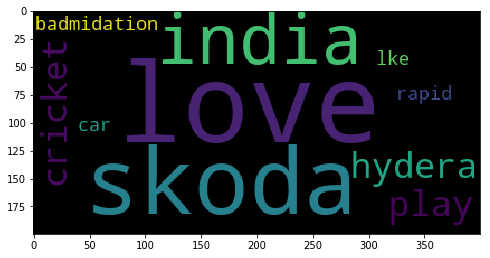

In [56]:
# use Word Cloud after lemmatization

testafterlemmy = ' '
for i in df['sentences']:
    for j in i:
        testafterlemmy+=' '+j   
        
plt.figure(figsize=(8,10))
wc1 = WordCloud(max_words=1000,random_state=1).generate(testafterlemmy)
plt.imshow(wc1)
plt.show()

#As we can see there is not change in word cloud

In [57]:
# Applying TfidfVectorizer
vect = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)
x = vect.fit_transform(df['sentences'])

In [58]:
# fit k-mean clustering
kmeans = KMeans(n_clusters=2, random_state = 0)

# predict our clusters for each song
X_clustered = kmeans.fit_predict(x)

# display by groups
df_plot = pd.DataFrame(list(x), list(X_clustered))
df_plot = df_plot.reset_index()
df_plot.rename(columns = {'index': 'Cluster'}, inplace = True)
df_plot['Cluster'] = df_plot['Cluster'].astype(int)

print(df_plot.head())

print(df_plot.groupby('Cluster').agg({'Cluster': 'count'}))

   Cluster                                                  0
0        0    (0, 4)\t0.8221903715494888\n  (0, 7)\t0.5692...
1        0    (0, 3)\t0.8221903715494888\n  (0, 7)\t0.5692...
2        1    (0, 2)\t0.5773502691896257\n  (0, 5)\t0.5773...
3        1    (0, 0)\t0.7071067811865476\n  (0, 8)\t0.7071...
4        0    (0, 1)\t0.5632824101457441\n  (0, 9)\t0.5632...
         Cluster
Cluster         
0              4
1              2


In [59]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vect.get_feature_names()
for i in range(2):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind],)

Top terms per cluster:
Cluster 0:
 love
 skoda
 india
 hydera
 lke
 rapid
 car
 would
 play
 like
Cluster 1:
 play
 badmidation
 would
 like
 cricket
 skoda
 rapid
 love
 lke
 india
